# EDA for risk assessment of a consumer finance company
The aim of analysis is this EDA case study is to understand how consumer attributes and loan attributes influence the tendency of loan defaulters, so that consumer financial firm is able to identify such most probabble defaulters and not sactions them a loan or does more stringent verification before giving them a loan.

There are 53 columns which are mostly not nullable, out of which we can use the data from the following columns for Analysis

1.	Loan Amount
2.	Funded Amount By investors
3.	Term
4.	Interest rate
5.	Grade
6.	Sub Grade
7.	Employment Length
8.	Home ownership
9.	Annual Income
10.	Verification status
11. The month which the loan was funded (issue_d)
12.	Loan status
13.	Purpose Of Loan
14.	Address State
15.	Debt To Income Ratio
16.	30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
17.	Inquiries in Last 6 Months
18.	Number of open credit lines in the borrower's credit file
19.	Revolving Balance 
 	



The above are the most important columns based on which customer attributes for loan are sanctioned


In [22]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Import the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Import the data
loan_data = pd.read_csv("loan.csv")
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade            ...              \
0   10.65%       162.87     B        B2            ...               
1   15.27%        59.83     C        C4            ...               
2   15.96%        84.33     C        C5            ...               
3   13.49%       339.31     C        C1            ...               
4   12.69%        67.79     B        B5            ...               

  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                NaN                NaN            NaN               NaN   
1                NaN                NaN            NaN               NaN   
2                NaN                NaN            NaN               NaN   
3                NaN                NaN            NaN               NaN   
4                NaN                NaN            NaN               NaN   

  pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                  0.0       0.0             NaN               NaN   
1                  0.0       0.0             NaN               NaN   
2                  0.0       0.0             NaN               NaN   
3                  0.0       0.0             NaN               NaN   
4                  0.0       0.0             NaN               NaN   

  total_bc_limit total_il_high_credit_limit  
0            NaN                        NaN  
1            NaN                        NaN  
2            NaN                        NaN  
3            NaN                        NaN  
4            NaN                        NaN  

[5 rows x 111 columns]

## Data Cleaning
We will be dropping the rest of the columns from the table other than the 19 selected columns and doing Univariate,Bivariate analysis on the rest 19 columns to understand how they affect the loan repaying capacity of an individual

In [5]:
# Drop the unnecessary columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [25]:
loan_data = loan_data.iloc[:,[2,4,5,6,8,9,11,12,13,14,15,16,20,23,24,25,27,30,32]]
loan_data.head()

loan_amnt  funded_amnt_inv        term int_rate grade sub_grade emp_length  \
0       5000           4975.0   36 months   10.65%     B        B2  10+ years   
1       2500           2500.0   60 months   15.27%     C        C4   < 1 year   
2       2400           2400.0   36 months   15.96%     C        C5  10+ years   
3      10000          10000.0   36 months   13.49%     C        C1  10+ years   
4       3000           3000.0   60 months   12.69%     B        B5     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

          purpose addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  \
0     credit_card         AZ  27.65            0               1         3   
1             car         GA   1.00            0               5         3   
2  small_business         IL   8.72            0               2         2   
3           other         CA  20.00            0               1        10   
4           other         OR  17.94            0               0        15   

   revol_bal  
0      13648  
1       1687  
2       2956  
3       5598  
4      27783

In [26]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt              39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null object
int_rate               39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null float64
delinq_2yrs            39717 non-null int64
inq_last_6mths         39717 non-null int64
open_acc               39717 non-null int64
revol_bal              39717 non-null int64
dtypes: float64(3), int64(5), object(1

## Data cleaning- delete rows where more than 50% data is null/missing

In [27]:
loan_data = loan_data[loan_data.columns[loan_data.isnull().mean() < 0.5]]
loan_data.head()

loan_amnt  funded_amnt_inv        term int_rate grade sub_grade emp_length  \
0       5000           4975.0   36 months   10.65%     B        B2  10+ years   
1       2500           2500.0   60 months   15.27%     C        C4   < 1 year   
2       2400           2400.0   36 months   15.96%     C        C5  10+ years   
3      10000          10000.0   36 months   13.49%     C        C1  10+ years   
4       3000           3000.0   60 months   12.69%     B        B5     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

          purpose addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  \
0     credit_card         AZ  27.65            0               1         3   
1             car         GA   1.00            0               5         3   
2  small_business         IL   8.72            0               2         2   
3           other         CA  20.00            0               1        10   
4           other         OR  17.94            0               0        15   

   revol_bal  
0      13648  
1       1687  
2       2956  
3       5598  
4      27783

In [28]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt              39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null object
int_rate               39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null float64
delinq_2yrs            39717 non-null int64
inq_last_6mths         39717 non-null int64
open_acc               39717 non-null int64
revol_bal              39717 non-null int64
dtypes: float64(3), int64(5), object(1

## Data cleaning- on the selected columns

In [29]:
# Term- check the unique values in term column
loan_data.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

since there are just two unique values in term, it does not need any data cleaning

In [30]:
# Interest rate is an object because of the %, clean this
loan_data.int_rate = pd.Series(loan_data.int_rate).str.replace('%', '').astype(float)
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate grade sub_grade  \
0       5000           4975.0   36 months     10.65     B        B2   
1       2500           2500.0   60 months     15.27     C        C4   
2       2400           2400.0   36 months     15.96     C        C5   
3      10000          10000.0   36 months     13.49     C        C1   
4       3000           3000.0   60 months     12.69     B        B5   

  emp_length home_ownership  annual_inc verification_status issue_d  \
0  10+ years           RENT     24000.0            Verified  Dec-11   
1   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2  10+ years           RENT     12252.0        Not Verified  Dec-11   
3  10+ years           RENT     49200.0     Source Verified  Dec-11   
4     1 year           RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose addr_state    dti  delinq_2yrs  inq_last_6mths  \
0   Fully Paid     credit_card         AZ  27.65            0               1   
1  Charged Off             car         GA   1.00            0               5   
2   Fully Paid  small_business         IL   8.72            0               2   
3   Fully Paid           other         CA  20.00            0               1   
4      Current           other         OR  17.94            0               0   

   open_acc  revol_bal  
0         3      13648  
1         3       1687  
2         2       2956  
3        10       5598  
4        15      27783

In [31]:
# Employment Length- employment length would make sense with employment title, But it can be used as categorical data
loan_data.replace('n/a', np.nan,inplace=True)
loan_data.emp_length.fillna(value=0,inplace=True)
loan_data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_data['emp_length'] = loan_data['emp_length'].astype(int)
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate grade sub_grade  \
0       5000           4975.0   36 months     10.65     B        B2   
1       2500           2500.0   60 months     15.27     C        C4   
2       2400           2400.0   36 months     15.96     C        C5   
3      10000          10000.0   36 months     13.49     C        C1   
4       3000           3000.0   60 months     12.69     B        B5   

   emp_length home_ownership  annual_inc verification_status issue_d  \
0          10           RENT     24000.0            Verified  Dec-11   
1           1           RENT     30000.0     Source Verified  Dec-11   
2          10           RENT     12252.0        Not Verified  Dec-11   
3          10           RENT     49200.0     Source Verified  Dec-11   
4           1           RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose addr_state    dti  delinq_2yrs  inq_last_6mths  \
0   Fully Paid     credit_card         AZ  27.65            0               1   
1  Charged Off             car         GA   1.00            0               5   
2   Fully Paid  small_business         IL   8.72            0               2   
3   Fully Paid           other         CA  20.00            0               1   
4      Current           other         OR  17.94            0               0   

   open_acc  revol_bal  
0         3      13648  
1         3       1687  
2         2       2956  
3        10       5598  
4        15      27783

In [32]:
loan_data.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [33]:
#Examining grade and subgrade- As per some independent reserach the grades and subgrades are given as part of the 
#Credit analysis and repaying capability/FICO scores 
loan_data.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [34]:
loan_data.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [35]:
#Examining home ownership
loan_data.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [36]:
#Examining verification status, loan status
loan_data.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [37]:
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [38]:
#Examining purpose
loan_data.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [39]:
#Drop records where values are less than 75%, also eliminate "Others" category
loan_purpose_delete = (loan_data.purpose.value_counts()*100)/len(loan_data)
loan_purpose_delete = loan_purpose_delete[(loan_purpose_delete < 0.75) | (loan_purpose_delete.index == 'other')]

loan_data.drop(labels = loan_data[loan_data.purpose.isin(loan_purpose_delete.index)].index, inplace=True)
print("Remaining Loan data",loan_data.shape ,"rows & columns.")

print(loan_data.purpose.unique())

Remaining Loan data (35621, 19) rows & columns.
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational']


okay, so we have comparitively clean data now, required for our analysis to find pattern in which defaulters may appear or loan should not be given to such individuals

In [40]:
#Address missing values
loan_data.fillna(0.0,inplace=True)
loan_data.fillna(0,inplace=True)

## Exploratory Data Analysis

Data analysis will be done on the above 18 variables to see how they influence each other

### Check Highly Correlated Data

In [41]:
cor = loan_data.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

funded_amnt_inv  loan_amnt    0.939139
dtype: float64

In [95]:
loan_correlation = loan_data.corr()
loan_correlation

loan_amnt  int_rate  emp_length  annual_inc       dti  \
loan_amnt           1.000000  0.318090    0.166605    0.416580  0.080219   
int_rate            0.318090  1.000000    0.022916    0.077745  0.115599   
emp_length          0.166605  0.022916    1.000000    0.188307  0.050141   
annual_inc          0.416580  0.077745    0.188307    1.000000 -0.115625   
dti                 0.080219  0.115599    0.050141   -0.115625  1.000000   
delinq_2yrs        -0.033367  0.154651    0.012102    0.027000 -0.036518   
inq_last_6mths      0.004753  0.134189    0.015355    0.040175 -0.000510   
open_acc            0.168393  0.012957    0.102229    0.256193  0.291109   
revol_bal           0.318376  0.097838    0.154662    0.419867  0.242496   
loan_income_ratio   0.623993  0.225747    0.002121   -0.317625  0.151775   

                   delinq_2yrs  inq_last_6mths  open_acc  revol_bal  \
loan_amnt            -0.033367        0.004753  0.168393   0.318376   
int_rate              0.154651        0.134189  0.012957   0.097838   
emp_length            0.012102        0.015355  0.102229   0.154662   
annual_inc            0.027000        0.040175  0.256193   0.419867   
dti                  -0.036518       -0.000510  0.291109   0.242496   
delinq_2yrs           1.000000        0.007327  0.010991  -0.059955   
inq_last_6mths        0.007327        1.000000  0.092914  -0.022469   
open_acc              0.010991        0.092914  1.000000   0.284919   
revol_bal            -0.059955       -0.022469  0.284919   1.000000   
loan_income_ratio    -0.061122       -0.029011 -0.044099   0.008999   

                   loan_income_ratio  
loan_amnt                   0.623993  
int_rate                    0.225747  
emp_length                  0.002121  
annual_inc                 -0.317625  
dti                         0.151775  
delinq_2yrs                -0.061122  
inq_last_6mths             -0.029011  
open_acc                   -0.044099  
revol_bal                   0.008999  
loan_income_ratio           1.000000

#### Checking Heat Map

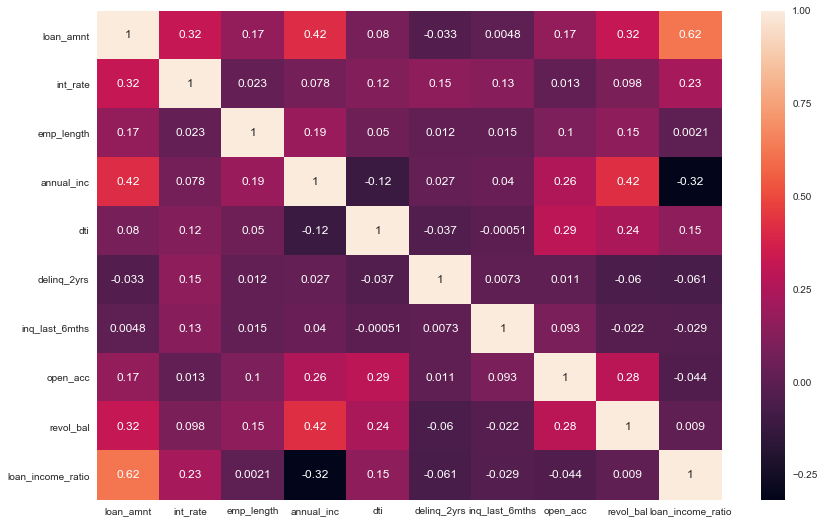

In [96]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [42]:
#drop the non-informative columns found above
loan_data.drop(['funded_amnt_inv'], axis=1, inplace=True)

In [43]:
loan_data.head()

loan_amnt        term  int_rate grade sub_grade  emp_length home_ownership  \
0       5000   36 months     10.65     B        B2          10           RENT   
1       2500   60 months     15.27     C        C4           1           RENT   
2       2400   36 months     15.96     C        C5          10           RENT   
5       5000   36 months      7.90     A        A4           3           RENT   
6       7000   60 months     15.96     C        C5           8           RENT   

   annual_inc verification_status issue_d  loan_status             purpose  \
0     24000.0            Verified  Dec-11   Fully Paid         credit_card   
1     30000.0     Source Verified  Dec-11  Charged Off                 car   
2     12252.0        Not Verified  Dec-11   Fully Paid      small_business   
5     36000.0     Source Verified  Dec-11   Fully Paid             wedding   
6     47004.0        Not Verified  Dec-11   Fully Paid  debt_consolidation   

  addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  revol_bal  
0         AZ  27.65            0               1         3      13648  
1         GA   1.00            0               5         3       1687  
2         IL   8.72            0               2         2       2956  
5         AZ  11.20            0               3         9       7963  
6         NC  23.51            0               1         7      17726

### Derived Metrics

#### 1. Loan Amount to annual income ratio

In [44]:
loan_data['loan_income_ratio']= loan_data['loan_amnt']/loan_data['annual_inc']

#### 2. Extract Year & Month from Issue date

In [46]:
loan_data['issue_month'],loan_data['issue_year'] = loan_data['issue_d'].str.split('-', 1).str
loan_data[['issue_d','issue_month','issue_year']].head()

issue_d issue_month issue_year
0  Dec-11         Dec         11
1  Dec-11         Dec         11
2  Dec-11         Dec         11
5  Dec-11         Dec         11
6  Dec-11         Dec         11

#### 3. Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)

In [47]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan_data['issue_month'] = pd.Categorical(loan_data['issue_month'],categories=months_order, ordered=True)

#### 4. Create Bins for range of Loan Amount

In [48]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_data['loan_amnt_range'] = pd.cut(loan_data['loan_amnt'], bins, labels=slot)

#### 5. Create Bins for range of Annual Income

In [49]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_data['annual_inc_range'] = pd.cut(loan_data['annual_inc'], bins, labels=slot)

#### 6. Create Bins for range of Interest rates

In [50]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], bins, labels=slot)

### Univariate Analysis

we would be using box plot, histogram and violin plot to see the spread of variables, for categorical variables we will be using the count and frequency - barchart for visualization

#### 1. Loan Amount

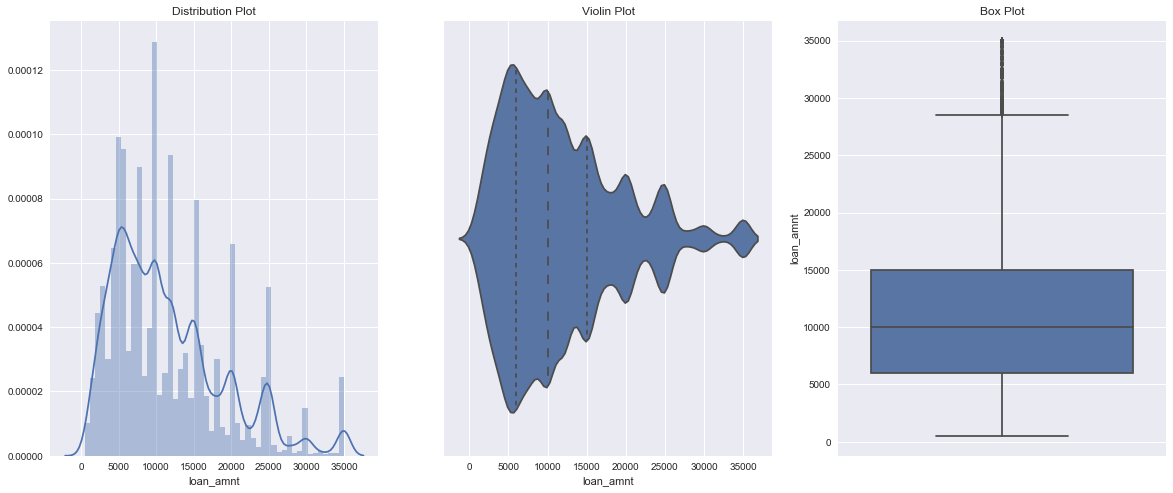

In [61]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan_data['loan_amnt'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan_data, x='loan_amnt',ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan_data, x='loan_amnt',ax=ax[2],orient='v')
plt.show()

##### Insight from the plot: Most of the loan amounts are concentrated between 6000 to 15000 USD

#### 2. Interest Rate

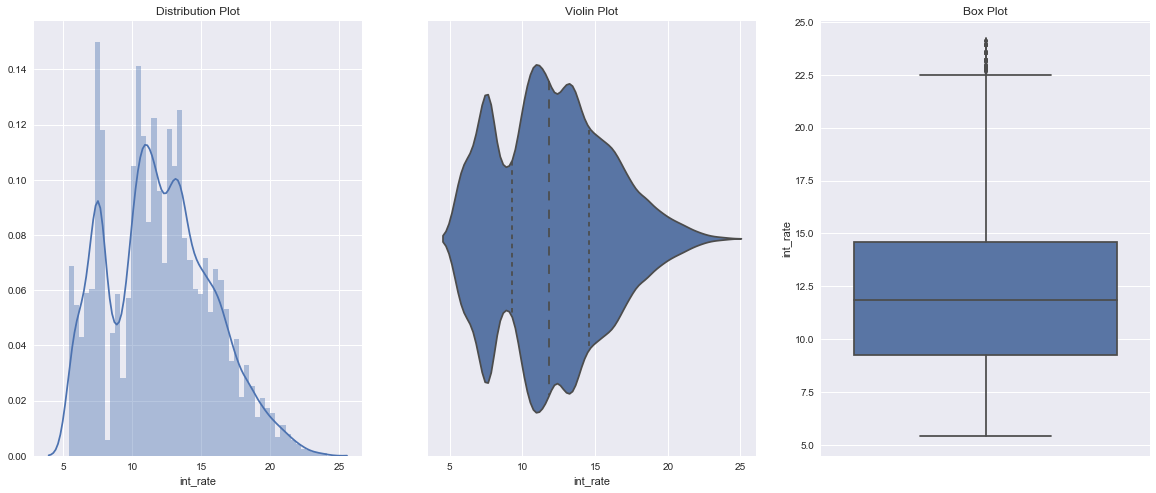

In [62]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan_data['int_rate'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan_data, x='int_rate',ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan_data, x='int_rate',ax=ax[2],orient='v')
plt.show()

##### Insight from the plot: Most of the Interest rates are concentrated between 10 to 16 percent

#### 3. Annual Income

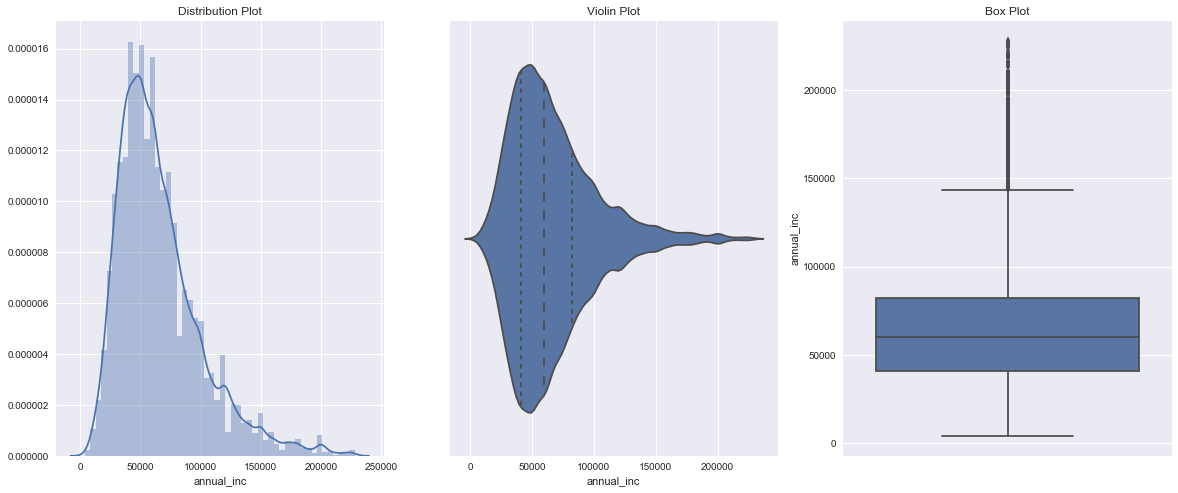

In [63]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan_data['annual_inc'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan_data, x='annual_inc',ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan_data, x='annual_inc',ax=ax[2],orient='v')
plt.show()

##### There is an outlier in the income, which needs to be filtered

In [57]:
loan_data["annual_inc"].describe()

count    3.562100e+04
mean     6.959688e+04
std      6.500998e+04
min      4.000000e+03
25%      4.160000e+04
50%      6.000000e+04
75%      8.300400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [59]:
loan_data = loan_data[loan_data["annual_inc"] < loan_data["annual_inc"].quantile(0.995)] # Removing outliers >99%
loan_data["annual_inc"].describe()

count     35236.000000
mean      65981.515492
std       34869.381637
min        4000.000000
25%       41000.000000
50%       59902.000000
75%       82000.000000
max      228000.000000
Name: annual_inc, dtype: float64

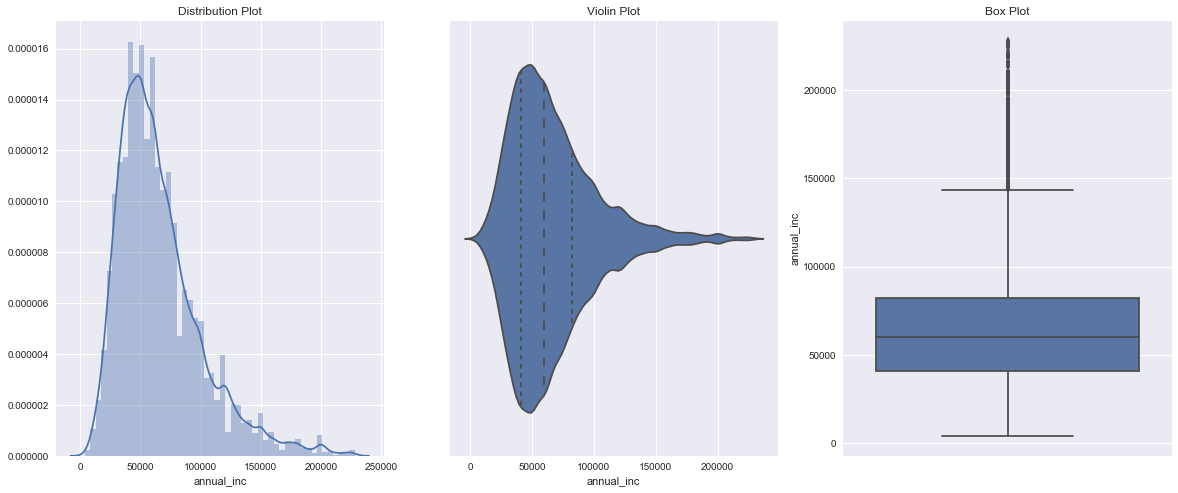

In [64]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan_data['annual_inc'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan_data, x='annual_inc',ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan_data, x='annual_inc',ax=ax[2],orient='v')
plt.show()

#### Insight from the plot: Most of the loan applicants earnings are concentrated between 40000 to 80000 USD

#### 4. Loan Status- Categorical analysis

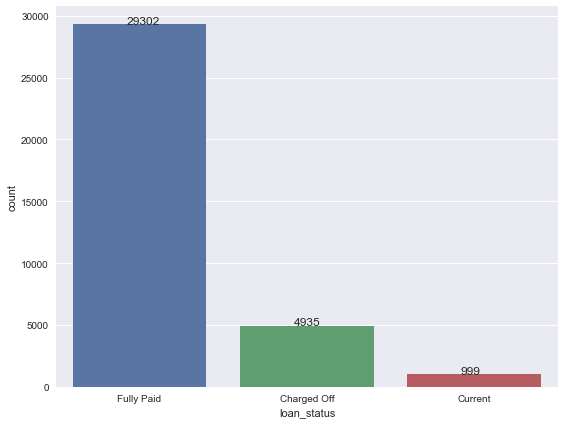

In [71]:
hue =None
q = pd.Series(data = hue)
fig, ax = plt.subplots()
width = len(loan_data['loan_status'].unique()) + 6 + 4*len(q.unique())
fig.set_size_inches(width , 7)
ax = sns.countplot(data = loan_data, x= 'loan_status', order=loan_data['loan_status'].value_counts().index,hue = hue) 
if len(q.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
del q
plt.show()

##### Insight from the plot: About 14% of the loan applicants are charged off

#### 5. Purpose of Loan

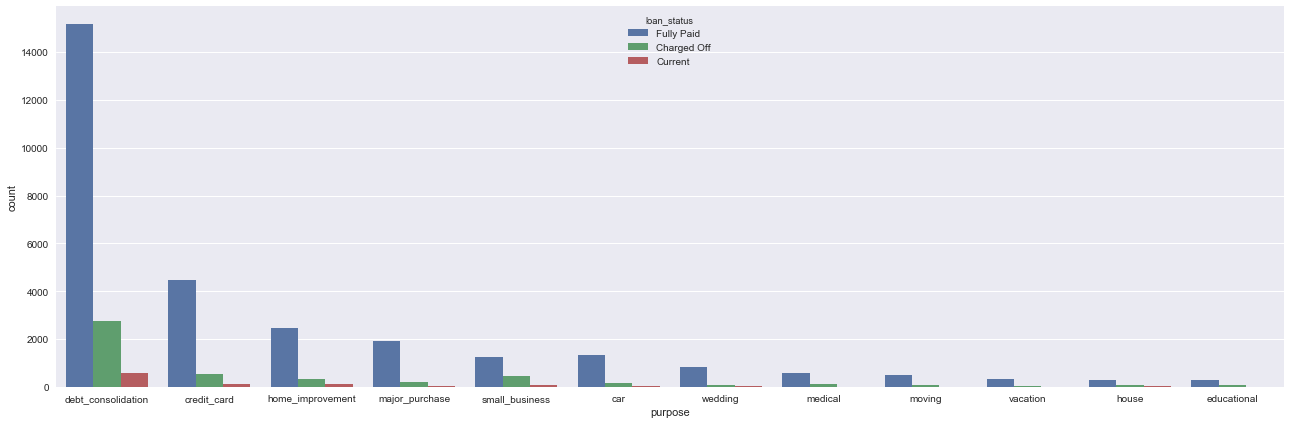

In [79]:
hue ='loan_status'
q = pd.Series(data = hue)
fig, ax = plt.subplots()
width = len(loan_data['purpose'].unique()) + 6 + 4*len(q.unique())
fig.set_size_inches(width , 7)
ax = sns.countplot(data = loan_data, x= 'purpose', order=loan_data['purpose'].value_counts().index,hue = hue) 
del q
plt.show()

##### Insight from the plot: Maximum applicants applied loan to do debt consolidation, to pay other loans

#### 6. Home Ownership

In [85]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
loan_data.drop(loan_data[loan_data['home_ownership'].isin(rem)].index,inplace=True)
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

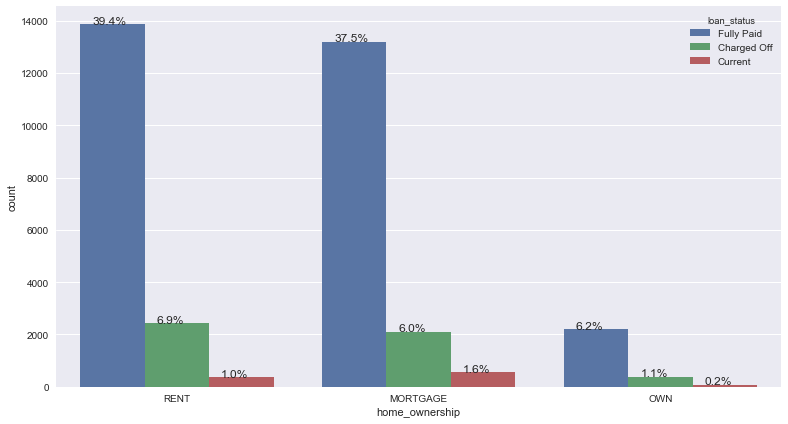

In [87]:
hue ='loan_status'
q = pd.Series(data = hue)
fig, ax = plt.subplots()
width = len(loan_data['home_ownership'].unique()) + 6 + 4*len(q.unique())
fig.set_size_inches(width , 7)
ax = sns.countplot(data = loan_data, x= 'home_ownership', order=loan_data['home_ownership'].value_counts().index,hue = hue) 
if len(q.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
del q
plt.show()

##### Insight from the plot: Maximum applicants either live in Rented homes or mortgaged homes

#### 7. Year wise Loan

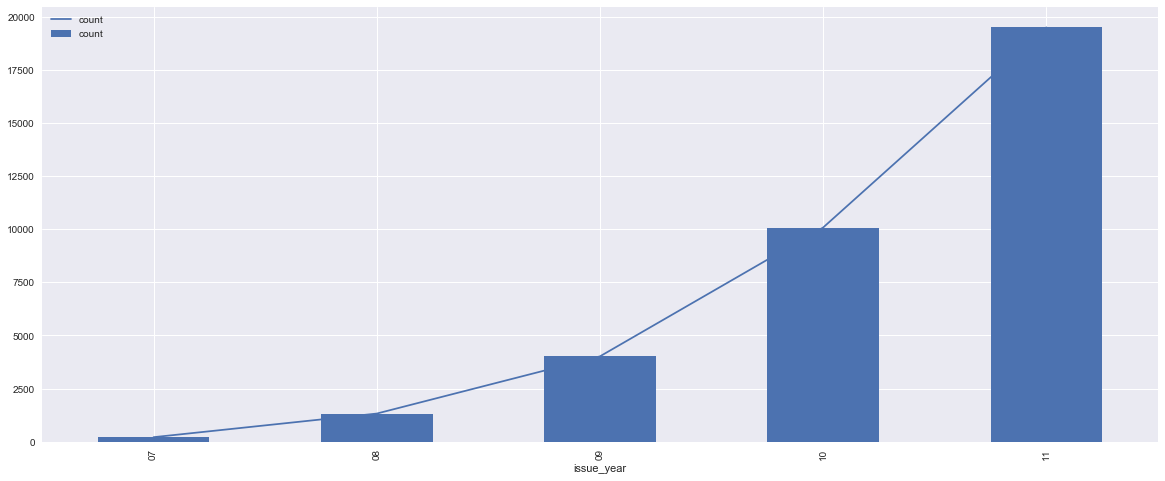

In [89]:
year_wise =loan_data.groupby(by= [loan_data.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

##### Insight from the plot: loan applicants are increasing year on year, 2011 maximum loan applicants received loan

#### 8. Loan Term

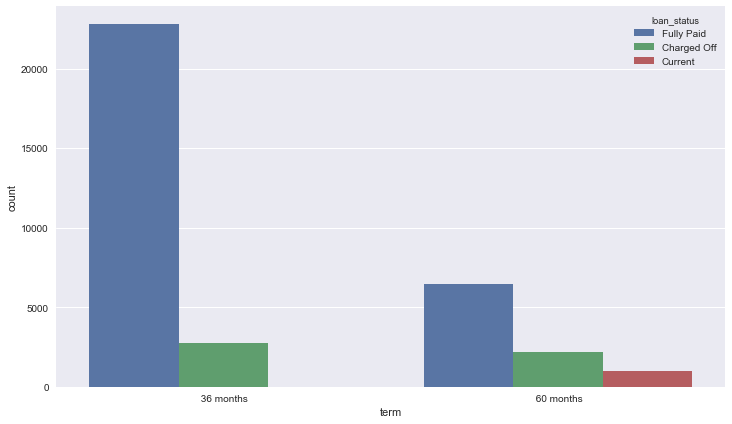

In [91]:
hue ='loan_status'
q = pd.Series(data = hue)
fig, ax = plt.subplots()
width = len(loan_data['term'].unique()) + 6 + 4*len(q.unique())
fig.set_size_inches(width , 7)
ax = sns.countplot(data = loan_data, x= 'term', order=loan_data['term'].value_counts().index,hue = hue) 
del q
plt.show()

##### Insightfrom the plot: maximum applicants took loan for 36 months term

### Bivariate Analysis

performing analysis on a combination of above variables

#### Purpose of Loan vs Loan Amount for each Loan Status

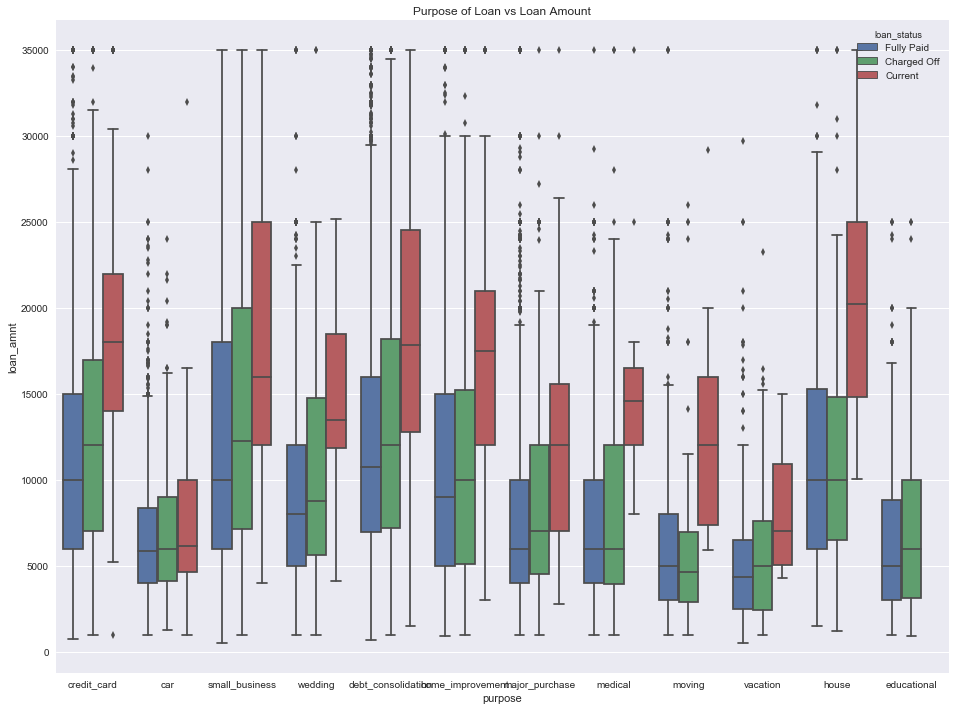

In [94]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan_data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

#### Employment Length vs Loan Amount for different pupose of Loan

In [99]:
loanstatus=loan_data.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan_data.loc[loan_data['loan_status']=='Charged Off']

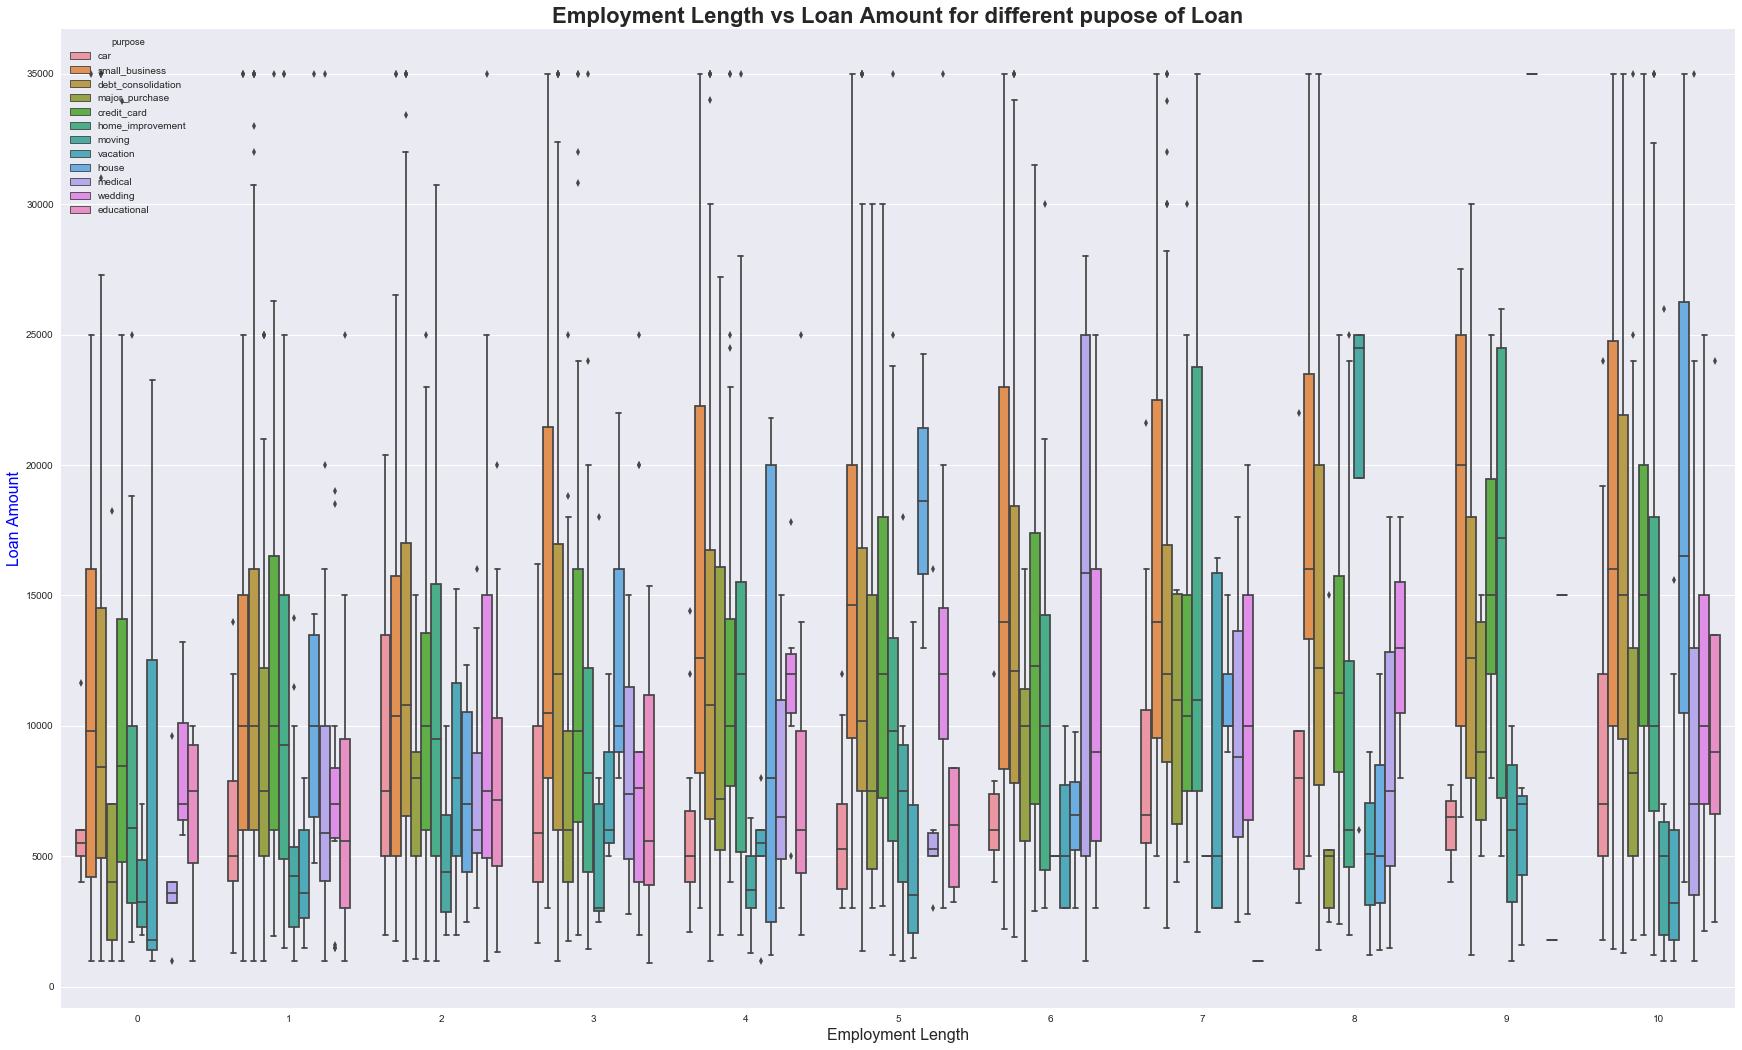

In [100]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

### Bivariate Analysis with probablity of charge off

ProbabilityofChargedOff=NumberofApplicantswhochargedoff/TotalNo.ofApplicants

In [101]:
#UDF: probability_calculate, function will be used to get the summarized table for each column(passed as a variable) along with probability of charge off w.r.t that column.
def probability_calculate(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [105]:
#UDF: bivariate_prob, unction will be used to plot count of values for each column(passed as a variable) stacked across 'loan_status' along with probability of charged off as a line chart.
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = probability_calculate(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()


##### 1. Location vs Probability Charge Off

In [103]:
filter_states = loan_data.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan_data.drop(labels = loan_data[loan_data.addr_state.isin(filter_states.index)].index)

loan_status  Charged Off  Current  Fully Paid   All  Probability_Charged Off
addr_state                                                                  
NJ                   253       53        1333  1639                    0.154
NM                    30        4         138   172                    0.174
NV                    90       15         329   434                    0.207
NY                   424       93        2778  3295                    0.129
OH                   138       40         926  1104                    0.125
OK                    35       11         217   263                    0.133
OR                    68       14         330   412                    0.165
PA                   156       49        1127  1332                    0.117
RI                    24        4         140   168                    0.143
SC                    50       10         335   395                    0.127
SD                    10        1          44    55                    0.182
TN                     2        0          12    14                    0.143
TX                   259       56        2069  2384                    0.109
UT                    33        6         200   239                    0.138
VA                   148       36        1077  1261                    0.117
VT                     6        1          40    47                    0.128
WA                   112       19         620   751                    0.149
WI                    56       18         350   424                    0.132
WV                    18        4         140   162                    0.111
WY                     4        3          65    72                    0.056

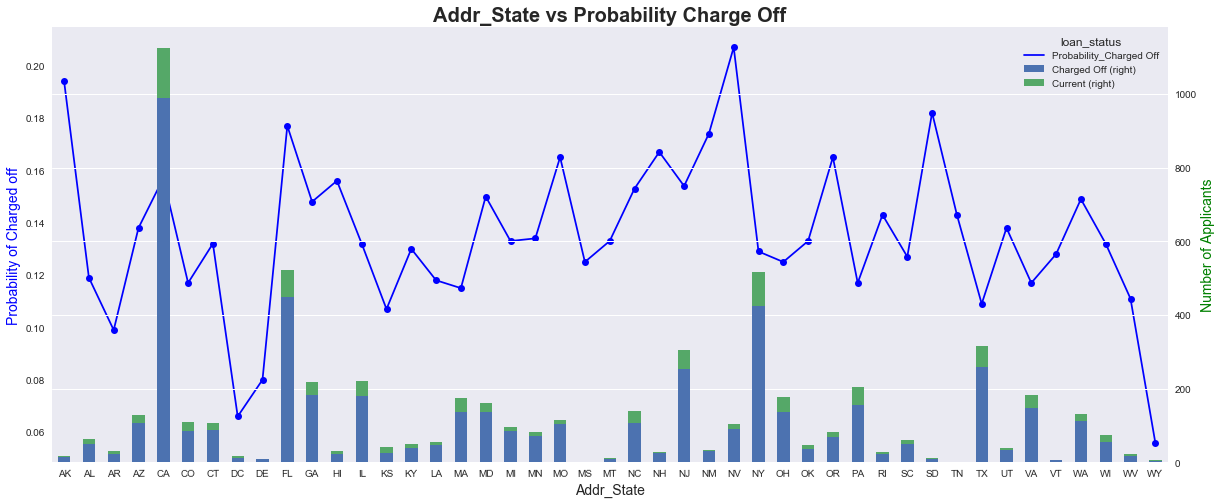

In [106]:
states = probability_calculate(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

##### Insight from the plot: Nevada is the state with highest probability of charge off

#### 2. Purpose of Loan vs Probability Charge Off

loan_status         Charged Off  Current  Fully Paid    All  \
purpose                                                       
car                         159       50        1330   1539   
credit_card                 534      102        4437   5073   
debt_consolidation         2745      580       15124  18449   
educational                  55        0         265    320   
home_improvement            337       97        2452   2886   
house                        58       14         297    369   
major_purchase              220       37        1900   2157   
medical                     106       12         565    683   
moving                       90        7         479    576   
small_business              468       74        1242   1784   
vacation                     53        6         322    381   
wedding                      94       20         821    935   

loan_status         Probability_Charged Off  
purpose                                      
car                                   0.103  
credit_card                           0.105  
debt_consolidation                    0.149  
educational                           0.172  
home_improvement                      0.117  
house                                 0.157  
major_purchase                        0.102  
medical                               0.155  
moving                                0.156  
small_business                        0.262  
vacation                              0.139  
wedding                               0.101

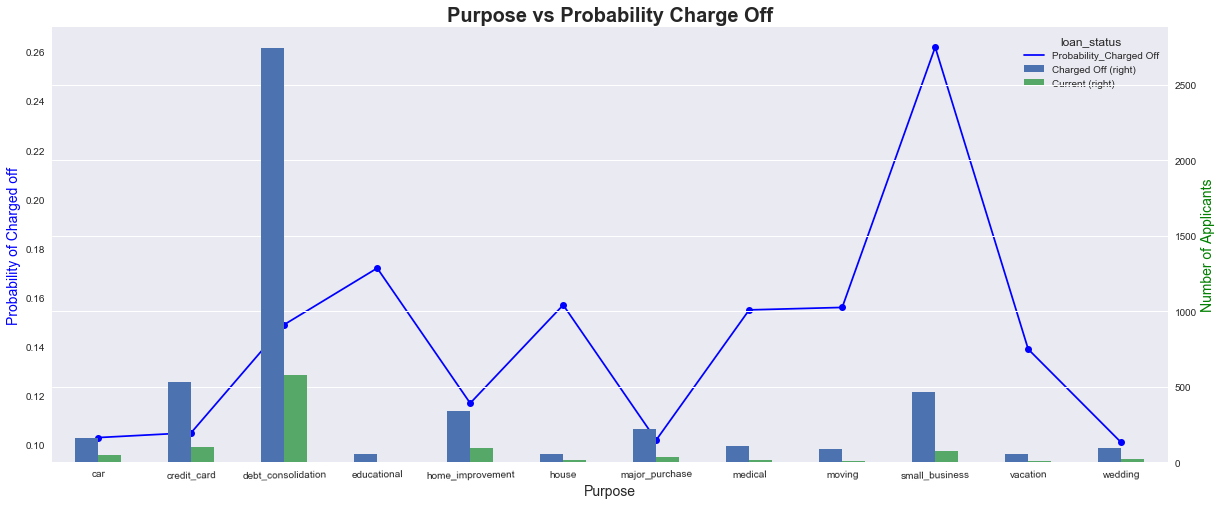

In [109]:
purpose = probability_calculate(loan_data,'purpose')
display(purpose)

bivariate_prob(df =loan_data,col ='purpose',stacked=False)

##### Insight from the plot: Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'

#### 3. Grade/Subgrade vs Probability Charge Off

loan_status  Charged Off  Current  Fully Paid    All  Probability_Charged Off
grade                                                                        
A                    511       31        8335   8877                    0.058
B                   1241      302        9106  10649                    0.117
C                   1167      240        5729   7136                    0.164
D                    982      191        3541   4714                    0.208
E                    639      160        1757   2556                    0.250
F                    290       61         586    937                    0.309
G                     89       14         180    283                    0.314

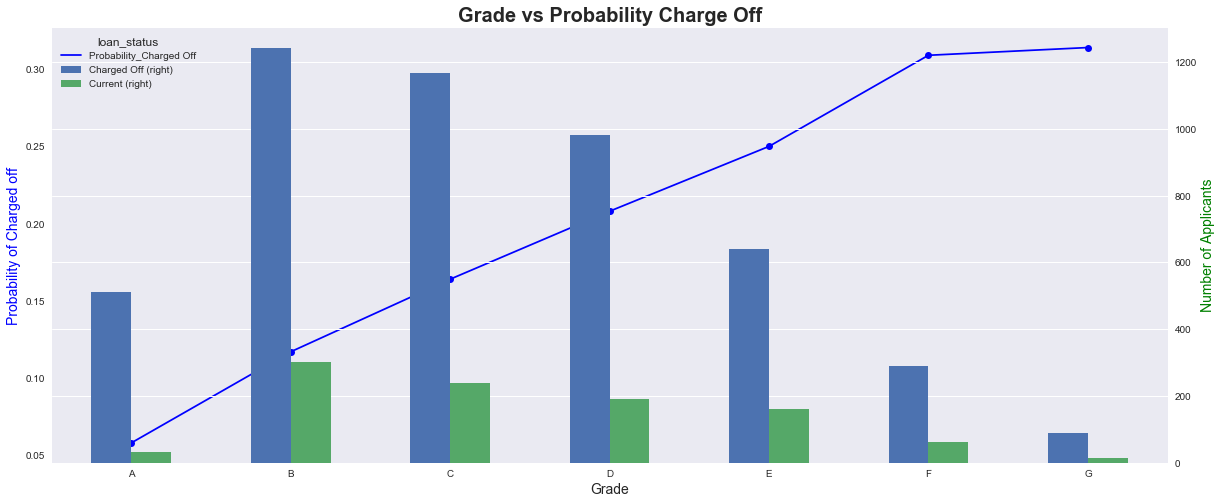

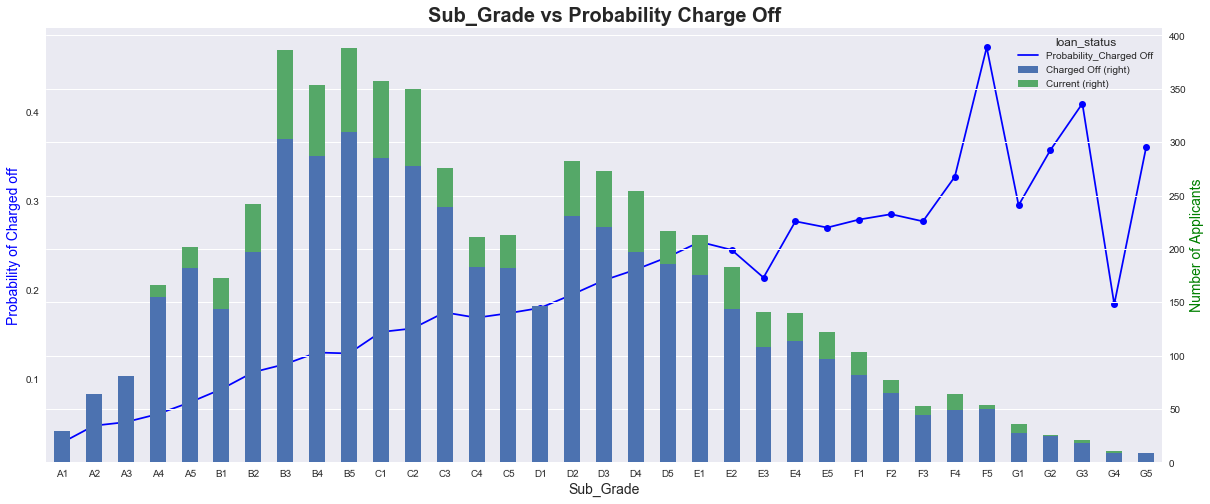

In [112]:
grade = probability_calculate(loan_data,'grade')
display(grade)

bivariate_prob(df =loan_data,col ='grade',stacked=False)
bivariate_prob(df =loan_data,col ='sub_grade')

##### Insight from the plot: A to G the probability of Charge off is increasing

#### 4. Annual Income Range vs Probability Charge Off

loan_status       Charged Off  Current  Fully Paid    All  \
annual_inc_range                                            
0-25000                   386       19        1705   2110   
25000-50000              1864      285        9531  11680   
50000-75000              1523      326        9036  10885   
100000 and above          669      198        4816   5683   
75000-100000              477      171        4146   4794   

loan_status       Probability_Charged Off  
annual_inc_range                           
0-25000                             0.183  
25000-50000                         0.160  
50000-75000                         0.140  
100000 and above                    0.118  
75000-100000                        0.099

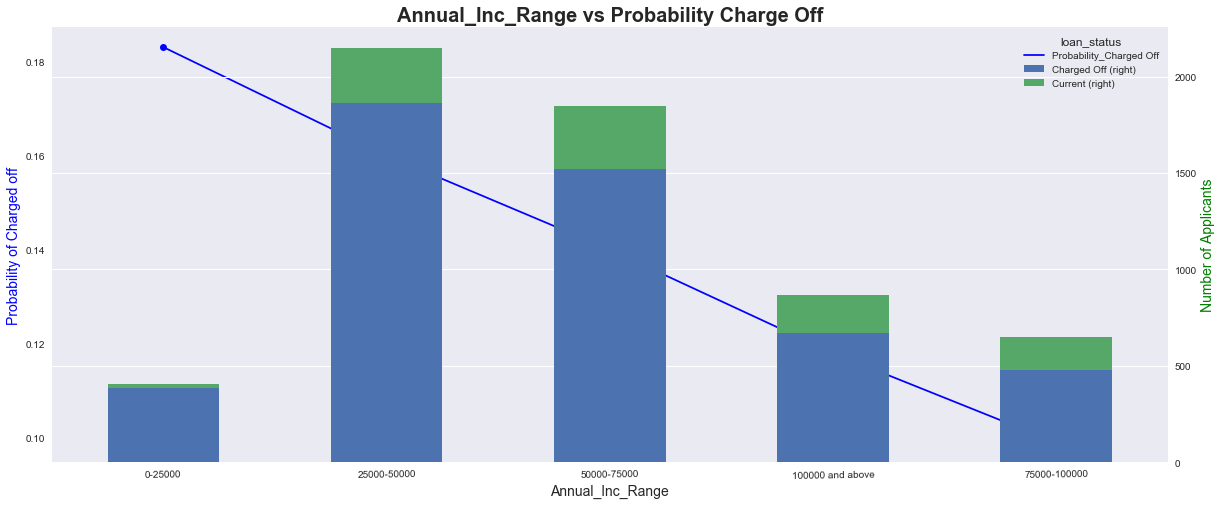

In [113]:
annual_inc_range = probability_calculate(loan_data,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan_data,col ='annual_inc_range')

##### Insight from the plot: As the annual income is decreasing the probability that person will default is increasing with highest (0 to 25000) salary bracket.

#### 5. Interest rate Range vs Probability Charge Off

loan_status     Charged Off  Current  Fully Paid     All  \
int_rate_range                                             
10-12.5                 224        5        4563  4792.0   
15 and above            477       59        5623  6159.0   
7.5-10                 1085      237        7201  8523.0   
NaN                    1284      230        6535     NaN   
12.5-15                1581      383        4889  8049.0   

loan_status     Probability_Charged Off  
int_rate_range                           
10-12.5                           0.047  
15 and above                      0.077  
7.5-10                            0.127  
NaN                                 NaN  
12.5-15                           0.196

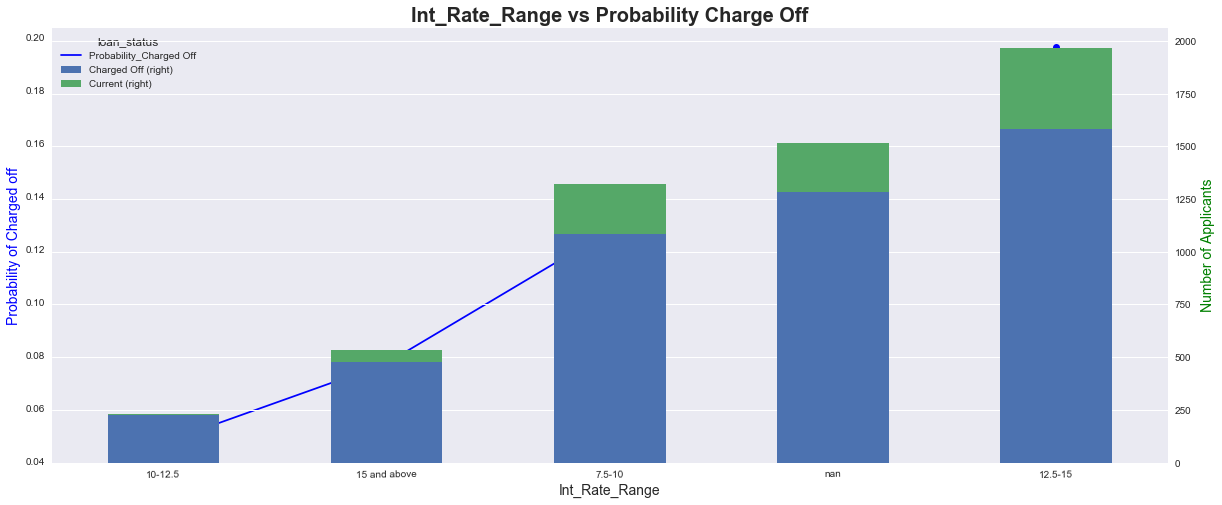

In [114]:
int_rate_range = probability_calculate(loan_data,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan_data,col ='int_rate_range')

##### Insight from the plot: As the interest rate is increasing the probability that person will default is increasing with highest at 15% & above bracket.

#### 6. Employment Length vs Probability Charge Off

loan_status  Charged Off  Current  Fully Paid   All  Probability_Charged Off
emp_length                                                                  
0                    189       34         678   901                    0.210
1                    954      126        5755  6835                    0.140
2                    481       88        3308  3877                    0.124
3                    483       66        3098  3647                    0.132
4                    400       83        2589  3072                    0.130
5                    412       77        2446  2935                    0.140
6                    276       50        1684  2010                    0.137
7                    232       54        1292  1578                    0.147
8                    183       34        1102  1319                    0.139
9                    144       30         953  1127                    0.128
10                  1165      357        6329  7851                    0.148

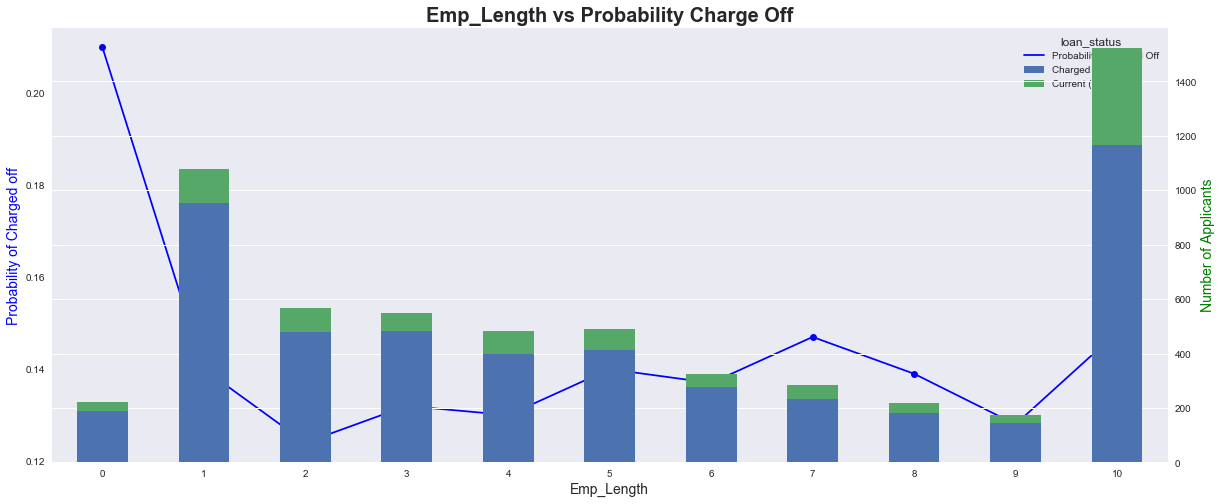

In [115]:
emp_length = probability_calculate(loan_data,'emp_length')
display(emp_length)

bivariate_prob(df =loan_data,col ='emp_length')

##### Insight fom the plot: Applicants who are self employed & less than 1 year of experience are more probable of charged off..

## Conclusion

The top major factors to consider while giving loan are :
    1. Purpose Of Loan
    2. Employment Length
    3. Grade
    4. Interest Rate
    5. Term
The detail conditions when the lending club can reject the loan ae mentioned under each plot